<a href="https://colab.research.google.com/github/Vilars/Data110/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.preprocessing import StandardScaler
import folium
from folium.plugins import HeatMap
import plotly.express as px
import plotly.graph_objects as go

In [2]:
co2_df = pd.read_csv('https://raw.githubusercontent.com/Vilars/Data110/refs/heads/main/Dataset/co2_global_emissions_lab_clean.csv')

In [3]:
co2_df.head()

,Country Name,Country Code,year,co2
0,Aruba,ABW,2000.0,26.194875
1,Aruba,ABW,2001.0,25.934024
2,Aruba,ABW,2002.0,25.671162
3,Aruba,ABW,2003.0,26.420452
4,Aruba,ABW,2004.0,26.517293


In [4]:
co2_df.describe()


,year,co2
count,3720.000000,3720.000000
mean,2007.032796,4.797763
std,4.319456,6.199335
min,2000.000000,0.017276
25%,2003.000000,0.814719
50%,2007.000000,2.861296
75%,2011.000000,6.764461
max,2014.000000,67.106018


In [ ]:
co2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3732 entries, 0 to 3731
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  3732 non-null   object 
 1   Country Code  3732 non-null   object 
 2   year          3720 non-null   float64
 3   co2           3720 non-null   float64
dtypes: float64(2), object(2)
memory usage: 116.8+ KB


In [ ]:
# check missing value
co2_df.isnull().sum()

,0
Country Name,0
Country Code,0
year,12
co2,12


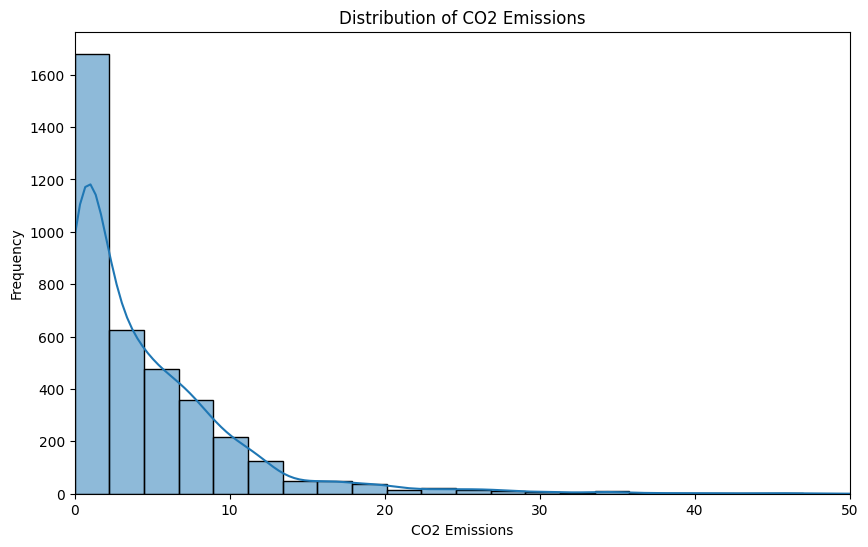

In [ ]:
# Co2 distribution
plt.figure(figsize=(10, 6))
sns.histplot(co2_df['co2'], bins=30, kde=True)
plt.xlim(0, 50)
plt.title('Distribution of CO2 Emissions')
plt.xlabel('CO2 Emissions')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'CO2 Emissions')

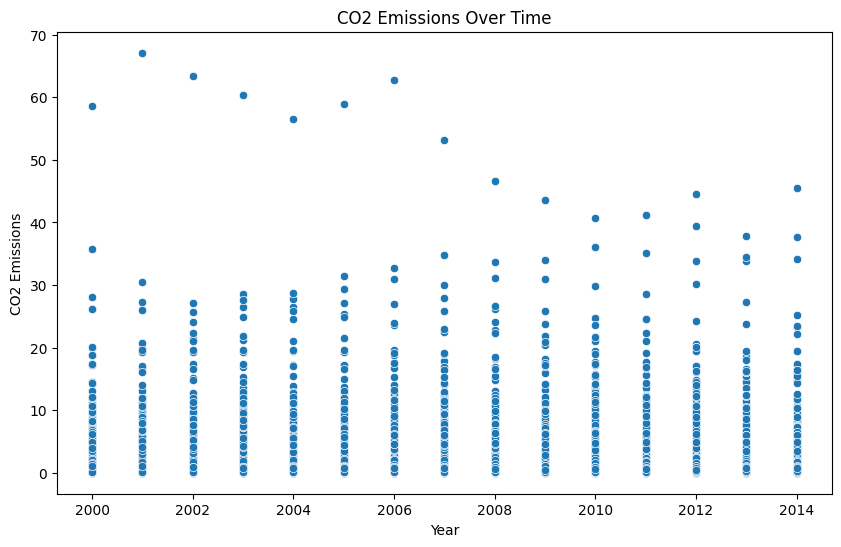

In [ ]:
# Scatterplot of Co2 per year

plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='co2', data=co2_df)
plt.title('CO2 Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')

In [31]:
# 2014 top 10
top_10_2014 = co2_df[co2_df['year'] == 2014].nlargest(10, 'co2')
top_10_2014.head()


,Country Name,Country Code,year,co2
2830,Qatar,QAT,2014.0,45.423240
709,Curacao,CUW,2014.0,37.726289
3414,Trinidad and Tobago,TTO,2014.0,34.163243
1804,Kuwait,KWT,2014.0,25.223864
300,Bahrain,BHR,2014.0,23.449755


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Qatar'),
  Text(1, 0, 'Curacao'),
  Text(2, 0, 'Trinidad and Tobago'),
  Text(3, 0, 'Kuwait'),
  Text(4, 0, 'Bahrain'),
  Text(5, 0, 'United Arab Emirates'),
  Text(6, 0, 'Brunei Darussalam'),
  Text(7, 0, 'Saudi Arabia'),
  Text(8, 0, 'Sint Maarten (Dutch part)'),
  Text(9, 0, 'Luxembourg')])

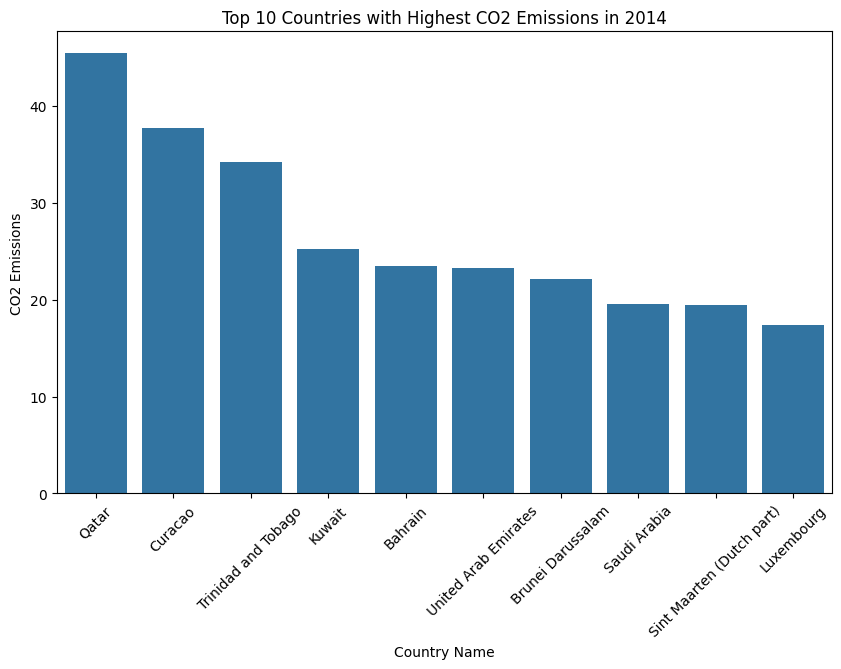

In [32]:
# bar plot top 10 2014
plt.figure(figsize=(10, 6))
sns.barplot(x='Country Name', y='co2', data=top_10_2014)
plt.title('Top 10 Countries with Highest CO2 Emissions in 2014')
plt.xlabel('Country Name')
plt.ylabel('CO2 Emissions')
plt.xticks(rotation=45)

Countries like Qatar, Curacao, Trinidad and Tobago are the highest Co2 emitters in 2014.

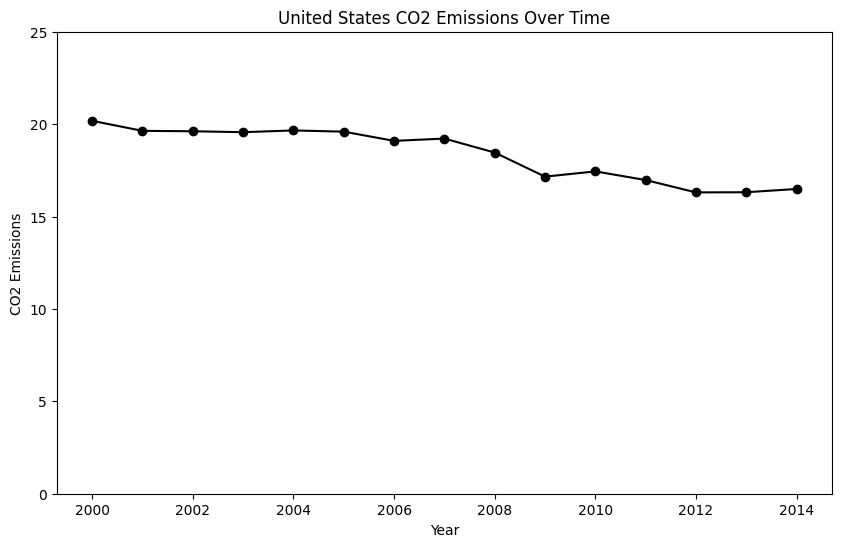

In [33]:
# Usa co2 emission over the years
usa_co2 = co2_df[co2_df['Country Name'] == 'United States']

# lineplot
plt.figure(figsize=(10, 6))
plt.plot('year', 'co2', '-ok', data=usa_co2)
plt.title('United States CO2 Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.ylim(0, 25)
plt.show()

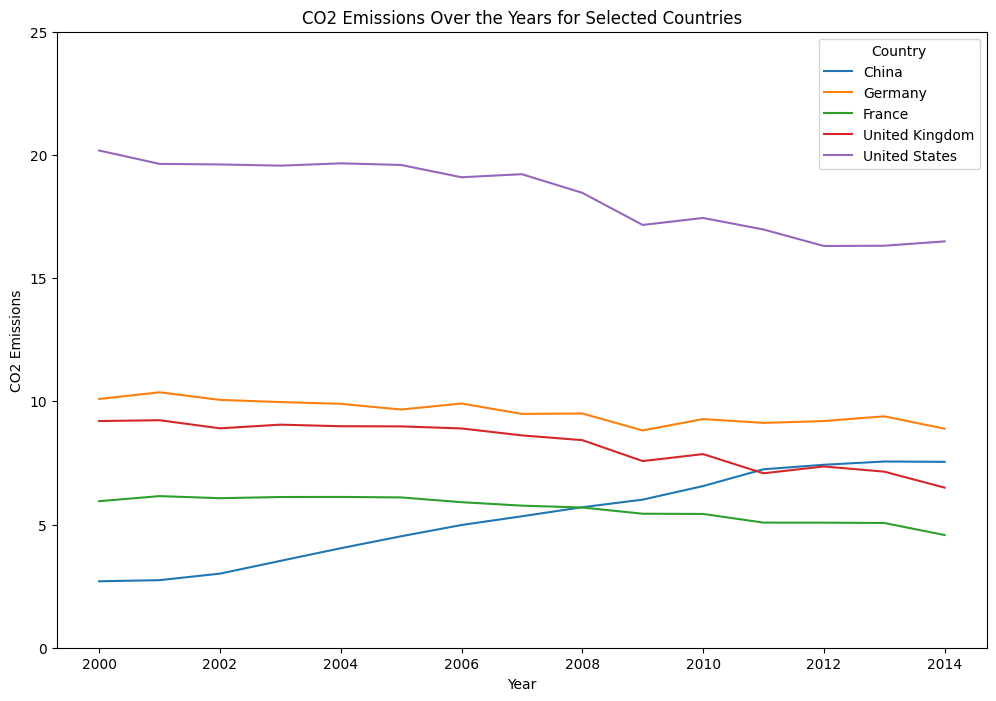

In [40]:
# Comparing US to selected countries
selected_countries = ['United States', 'France', 'Germany', 'United Kingdom', 'China']
df_selected = co2_df[co2_df['Country Name'].isin(selected_countries)]

# plot over the years
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_selected, x='year', y='co2', hue='Country Name')
plt.title('CO2 Emissions Over the Years for Selected Countries')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.legend(title='Country')
plt.ylim(0, 25)

plt.show()

In [34]:
# Tree map
!pip install squarify
import squarify

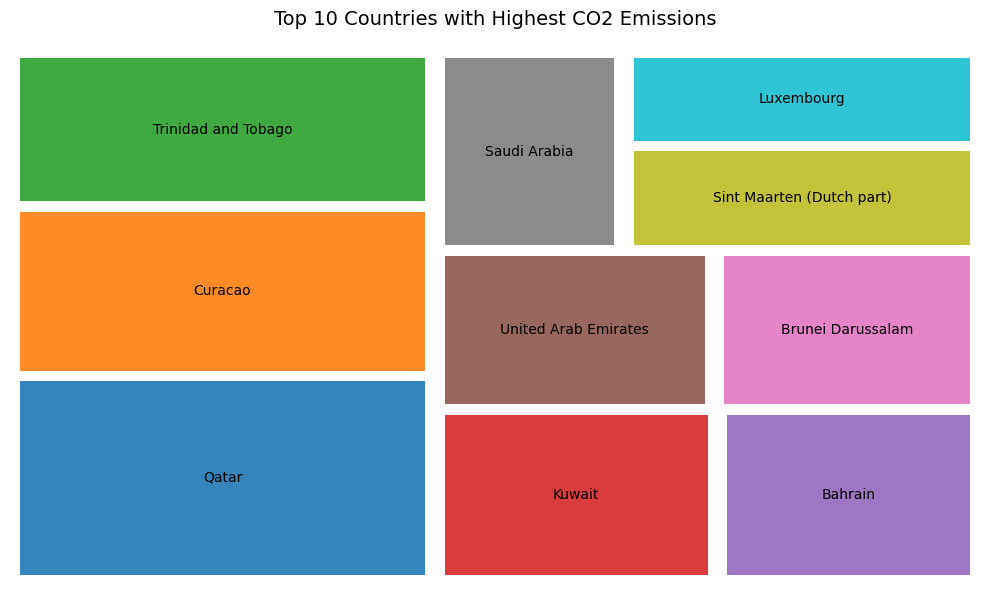

In [35]:
# data
treemap_data = top_10_2014.groupby(['Country Name','co2']).size().reset_index(name='count')
treemap_data = treemap_data.nlargest(10, 'co2')
# color
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# plot
plt.figure(figsize=(10, 6))
squarify.plot(sizes=treemap_data['co2'],
              label=treemap_data['Country Name'],
              color=colors,
              alpha=0.9,
              pad=True)
plt.axis('off')
plt.title('Top 10 Countries with Highest CO2 Emissions', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

In [6]:
# group by 2014 co2 emission
df = co2_df[co2_df['year'] == 2014]
print(df)

      Country Name Country Code    year       co2
14           Aruba          ABW  2014.0  8.408363
29     Afghanistan          AFG  2014.0  0.299445
44          Angola          AGO  2014.0  1.291328
59         Albania          ALB  2014.0  1.978763
74         Andorra          AND  2014.0  5.832170
...            ...          ...     ...       ...
3670         Samoa          WSM  2014.0  1.029788
3686   Yemen, Rep.          YEM  2014.0  0.864835
3701  South Africa          ZAF  2014.0  8.980119
3716        Zambia          ZMB  2014.0  0.288271
3731      Zimbabwe          ZWE  2014.0  0.779956

[250 rows x 4 columns]


In [7]:

# Choropleth map
mapping_data = df[['Country Name', 'co2']]
fig = px.choropleth(
    mapping_data,
    locations='Country Name',
    color="co2",
    locationmode="country names",
    hover_name="Country Name",
    title="Choropleth Map of emission by Country",
    color_continuous_scale=px.colors.sequential.Viridis,
)
fig.show()

In [29]:
# Sankey

# regions
regions = {
    'North America': ['United States', 'Canada', 'Mexico'],
    'Asia': ['China', 'India', 'Japan','Qatar', 'Kuwait'],
    'Europe': ['Germany', 'United Kingdom', 'France','Central Europe and the Baltics', 'Russian Federation'],
    'South America': ['Brazil', 'Argentina', 'Curacao'],
    'Africa': ['South Africa', 'Nigeria','Sub-Saharan Africa']
}
# Assign regions to countries
df['Region'] = df['Country Name'].apply(lambda x: next((region for region,
      countries in regions.items() if x in countries), 'Other'))

# Aggregate CO2 emissions by region and year
df_region_year = df.groupby(['Region', 'year'])['co2'].sum().reset_index()

# nodes and links for the Sankey diagram
nodes = list(df_region_year['Region'].unique()) + list(df_region_year['year'].unique())
node_indices = {node: i for i, node in enumerate(nodes)}
links = {
    'source': [node_indices[row['Region']] for _, row in df_region_year.iterrows()],
    'target': [node_indices[row['year']] for _, row in df_region_year.iterrows()],
    'value': df_region_year['co2']
}

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes
         ),
    link=dict(
        source=links['source'],
        target=links['target'],
        value=links['value']
    )
)])

fig.update_layout(title_text="Sankey Diagram of CO2 Emissions by Region", font_size=10)
fig.show()
links = {
    'source': [node_indices[row['Region']] for _, row in df_region_year.iterrows()],
    'target': [node_indices[row['year']] for _, row in df_region_year.iterrows()],
    'value': df_region_year['co2']}



<ipython-input-29-cb439edd5dde>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



By following the bands from the regions to the year 2014, you can see how much each region contributed to the total global CO2 emissions in that year. Asia is contributing the highest emission followed by other regions.
The diagram allows you to easily compare the emissions from different regions. For example, you can see that Asia has a significantly larger contribution compared to South America or Africa.
The Sankey diagram provides a visual representation of the overall flow of CO2 emissions, highlighting the major sources and their relative contributions in 2014.